In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(['math_score'],axis='columns')
Y=df.math_score

In [6]:
X.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93


In [7]:
Y.head(3)

0    72
1    69
2    90
Name: math_score, dtype: int64

In [15]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
ss = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('onehotencoder',ohe,cat_features),
        ('standardscaler',ss,num_features),
    ]
)

In [16]:
X=preprocessor.fit_transform(X)

In [19]:
X.shape

(1000, 19)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7)


In [23]:
len(X_train),len(X_test)

(700, 300)

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
lr = cross_val_score(LinearRegression(),X,Y)
lr.mean()

0.8717997497009924

In [27]:
lr = cross_val_score(KNeighborsRegressor(),X,Y)
lr.mean()

0.776478311268918

In [28]:
lr = cross_val_score(DecisionTreeRegressor(),X,Y)
lr.mean()

0.7052881250716301

In [29]:
lr = cross_val_score(RandomForestRegressor(),X,Y)
lr.mean()

0.8350455972677118

In [30]:
lr = cross_val_score(Ridge(),X,Y)
lr.mean()

0.8718283476100599

In [31]:
lr = cross_val_score(Lasso(),X,Y)
lr.mean()

0.808534190655663

In [32]:
linear = LinearRegression()
model = linear.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.877189281435205

In [38]:
y_pred = model.predict(X_test)

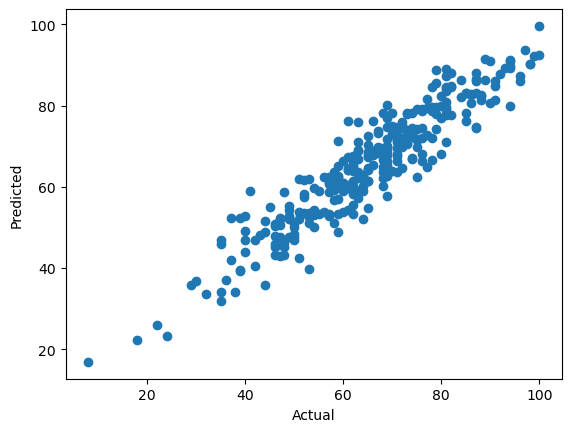

In [39]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
plt.scatter(Y,X[''],color='red',marker="*")

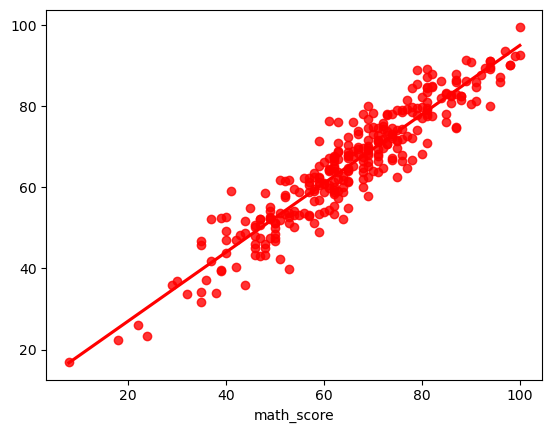

In [41]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [40]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
132,87,74.840237,12.159763
969,75,74.221044,0.778956
331,47,42.985845,4.014155
350,52,61.645141,-9.645141
413,63,71.011178,-8.011178
...,...,...,...
366,69,57.839980,11.160020
955,72,71.962112,0.037888
412,71,68.214202,2.785798
989,67,69.373941,-2.373941
